<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/%E0%B8%82%E0%B9%89%E0%B8%AD3Text_Analytics68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: เฟิร์สมินอย

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายวรพล พลตรี 663020038-5
2. นายวิศรุค แสนบึง 663020296-3
3. นางสาวพัชรี ดียา
4. นางสาวศิริวรรณ นวลวัน 663020585-6
5. นายเสฎฐวุฒิ นาคสังข์ 663020586-4

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [ ]:
# หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip install nltk
!pip install wordcloud
!pip install Pillow
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# เปลี่ยน path ตรงนี้
file_path = data = '/content/drive/MyDrive/ProjectBigData/thailand_tweets.txt'

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
# Inspect using pretty print
pprint.pprint(tweets[:2])

# Load into a Pandas DataFrame
tweets_df = pd.DataFrame(tweets)
tweets_df.head()

['{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": '
 '"matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": '
 '"https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, '
 '"likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", '
 '"content": "Thanks for asking! Yes, we will support shipping to most '
 'countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], '
 '"images": [], "videos": [], "tweet_url": '
 '"https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, '
 '"1564764866598080513": {"tweet_id": "1564764866598080513", "username": '
 '"DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": '
 '"https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, '
 '"likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", '
 '"content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography '
 '\\n@tombraider\\n @crystaldynamics", "hashtag

,0
0,"{""1564764893038882816"": {""tweet_id"": ""15647648..."


#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

#### รายงาน: จงตอบคำถามต่อไปนี้
* จำนวนทั้งหมดของทวีตที่รวบรวมในไฟล์
* เนื้อหาของทวีตครั้งแรก:
* ทวีตครั้งแรกมีแฮชแท็กหรือการกล่าวถึงใด ๆ หรือไม่?
* รวบรวมแฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยจากข้อมูลนี้
* ค้นหาทวีตที่นิยมที่สุดในคอลเลกชันของทวีตของคุณ, นั่นคือทวีตที่มีจำนวนที่สุดของ retweet / ตอบ / ชอบนับ
* แสดง 5 ทวีตด้านบนที่เป็นที่นิยมมากที่สุดในกลุ่มของคุณ
สามารถใช้ ` np.argsort () [:5]` ซึ่งจะแสดงผล ดัชนี ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ ` np.argsort () [::-1][:5]` จะแสดงผล ดัชนี ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า ( https://numpy.org/doc/stable/reference/generated/numpy.argsort.html )
* สร้างเมฆคำของคำในเนื้อหา อย่างไรก็ตาม เราสังเกตว่าคำว่า cloud นี้ไม่ได้เป็นตัวแทนที่ดีของประเทศไทย เนื่องจากขนาดข้อมูลน้อย

## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [ ]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/Users/pitchayaw/Desktop/TeachingKKU/BasicOfDS/CaseStudy2/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
import json
import pandas as pd

# We only use the first 100,000 reviews
n = 100000
reviews = []
# ******************************************************************************
# PLEASE REPLACE THE FOLLOWING PATH WITH THE CORRECT PATH TO YOUR FILE IN GOOGLE DRIVE
review_file_path = '/content/drive/MyDrive/DW part2/yelp_academic_dataset_review.json' # Replace with your copied path
# ******************************************************************************

with open(review_file_path, 'r') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  object 
 1   name                100000 non-null  object 
 2   review_count        100000 non-null  int64  
 3   yelping_since       100000 non-null  object 
 4   useful              100000 non-null  int64  
 5   funny               100000 non-null  int64  
 6   cool                100000 non-null  int64  
 7   elite               100000 non-null  object 
 8   friends             100000 non-null  object 
 9   fans                100000 non-null  int64  
 10  average_stars       100000 non-null  float64
 11  compliment_hot      100000 non-null  int64  
 12  compliment_more     100000 non-null  int64  
 13  compliment_profile  100000 non-null  int64  
 14  compliment_cute     100000 non-null  int64  
 15  compliment_list     100000 non-null

อ่านข้อมูล business

In [ ]:
# We only use the first 100,000 businesses
n = 100000
businesses = []
# ******************************************************************************
# PLEASE REPLACE THE FOLLOWING PATH WITH THE CORRECT PATH TO YOUR FILE IN GOOGLE DRIVE
business_file_path = '/content/drive/MyDrive/DW part2/yelp_academic_dataset_business.json' # Replace with your copied path
# ******************************************************************************

with open(business_file_path, 'r') as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
        if i+1 >= n:
            break
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   100000 non-null  object 
 1   name          100000 non-null  object 
 2   address       100000 non-null  object 
 3   city          100000 non-null  object 
 4   state         100000 non-null  object 
 5   postal_code   100000 non-null  object 
 6   latitude      100000 non-null  float64
 7   longitude     100000 non-null  float64
 8   stars         100000 non-null  float64
 9   review_count  100000 non-null  int64  
 10  is_open       100000 non-null  int64  
 11  attributes    90915 non-null   object 
 12  categories    99931 non-null   object 
 13  hours         84564 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 10.7+ MB


อ่านข้อมูล user

In [ ]:
# We only use the first 100,000 users
n = 100000
users = []
# ******************************************************************************
# PLEASE REPLACE THE FOLLOWING PATH WITH THE CORRECT PATH TO YOUR FILE IN GOOGLE DRIVE
users_file_path = '/content/drive/MyDrive/DW part2/yelp_academic_dataset_user.json' # Replace with your copied path
# ******************************************************************************

with open(users_file_path, 'r') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
        if i+1 >= n:
            break
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  object 
 1   name                100000 non-null  object 
 2   review_count        100000 non-null  int64  
 3   yelping_since       100000 non-null  object 
 4   useful              100000 non-null  int64  
 5   funny               100000 non-null  int64  
 6   cool                100000 non-null  int64  
 7   elite               100000 non-null  object 
 8   friends             100000 non-null  object 
 9   fans                100000 non-null  int64  
 10  average_stars       100000 non-null  float64
 11  compliment_hot      100000 non-null  int64  
 12  compliment_more     100000 non-null  int64  
 13  compliment_profile  100000 non-null  int64  
 14  compliment_cute     100000 non-null  int64  
 15  compliment_list     100000 non-null

### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,0,0,0,0,0,0,0,0,0,0
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,14,3,1,1,63,96,86,86,49,27
2,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,The Voodoo Bone Lady Tours,...,0,0,0,0,0,2,0,0,0,0
3,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,Fries Rebellion,...,0,0,0,0,0,0,0,0,0,0
4,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5.0,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21 14:48:06,Shalimar Fine Jewelers,...,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,SqlMnPnNblunD7LQ4RV0yQ,6o3HCqQRaIusRWCCD4-iDw,GUNpbcLvHZLE3NpOifjNUQ,3.0,1,0,0,It's tough to review this place. I say that be...,2013-01-07 15:43:45,Slate,...,1,0,1,2,2,2,1,1,0,0
58352,v0QEnVoNUitp6dctRMiVrQ,zvK7PGyyvWMLqpdX6LCZTg,Z5po0aTuzKKblek5y6Sp8Q,4.0,0,0,0,Less greasy than 5 Guys. I ordered mine med ra...,2011-08-30 16:16:26,500 Degrees,...,0,0,0,0,1,2,0,0,0,0
58353,q7C0jXHdey6HeplnuK7HQg,CmWitqya9LD6w8gBvBaDCw,JOvNunKJlWhwJRwLmUR9ZA,4.0,0,0,0,We liked everything about Tryst. Love the out-...,2017-05-30 01:43:24,Tryst Gastro Lounge,...,0,0,0,0,0,0,1,1,1,0
58354,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4.0,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,Buena Vista Mexican Restaurant,...,0,0,0,0,1,1,0,0,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   review_id                     58356 non-null  object 
 1   user_id                       58356 non-null  object 
 2   business_id                   58356 non-null  object 
 3   stars_review                  58356 non-null  float64
 4   useful_review_business        58356 non-null  int64  
 5   funny_review_business         58356 non-null  int64  
 6   cool_review_business          58356 non-null  int64  
 7   text                          58356 non-null  object 
 8   date                          58356 non-null  object 
 9   name_review_business          58356 non-null  object 
 10  address                       58356 non-null  object 
 11  city                          58356 non-null  object 
 12  state                         58356 non-null  object 
 13  p

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

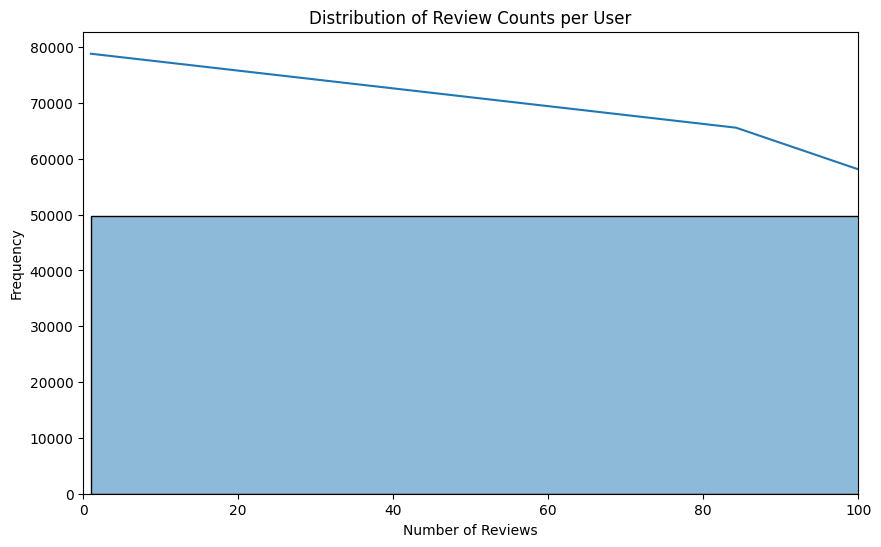

In [ ]:
# Plot the distribution of review counts per user
plt.figure(figsize=(10, 6))
sns.histplot(df['review_count_user'], bins=50, kde=True)
plt.title('Distribution of Review Counts per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 100) # Limit x-axis for better visualization of the majority
plt.show()

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

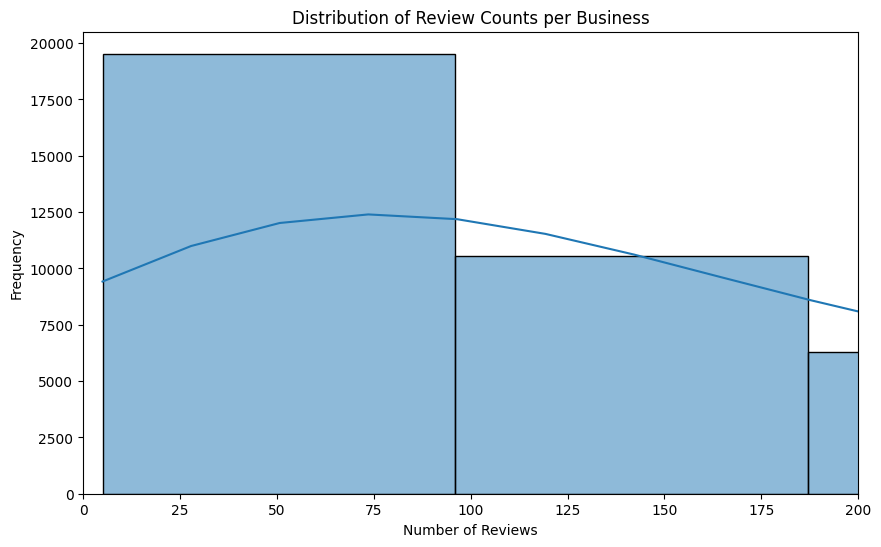

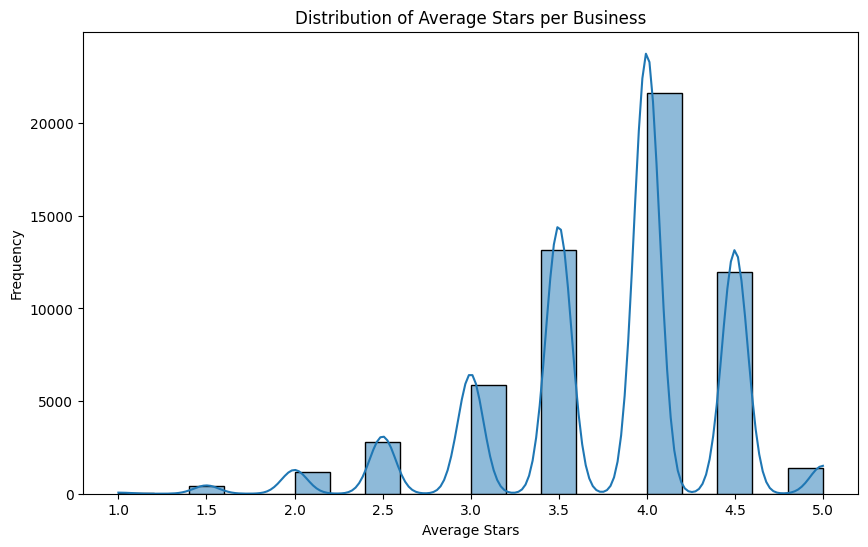

In [ ]:
# Plot the distribution of review counts per business
plt.figure(figsize=(10, 6))
sns.histplot(df['review_count_review_business'], bins=50, kde=True)
plt.title('Distribution of Review Counts per Business')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Limit x-axis for better visualization
plt.show()

# Plot the distribution of average stars per business
plt.figure(figsize=(10, 6))
sns.histplot(df['stars_business'], bins=20, kde=True)
plt.title('Distribution of Average Stars per Business')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.show()

มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
from collections import Counter

# Split the categories string into a list of categories, handling missing values
categories_list = df['categories'].dropna().str.split(', ')

# Flatten the list of lists into a single list of categories
all_categories = [category for sublist in categories_list for category in sublist]

# Count the frequency of each category
category_counts = Counter(all_categories)

# Display the most common categories
print("Most common business categories:")
for category, count in category_counts.most_common(20):
    print(f"{category}: {count}")

Most common business categories:
Restaurants: 41991
Food: 17848
Nightlife: 14161
Bars: 13281
American (New): 9574
American (Traditional): 8216
Breakfast & Brunch: 7975
Sandwiches: 5805
Event Planning & Services: 5711
Coffee & Tea: 4770
Seafood: 4515
Burgers: 4189
Pizza: 3887
Mexican: 3831
Shopping: 3797
Arts & Entertainment: 3631
Hotels & Travel: 3527
Italian: 3527
Cafes: 3163
Cocktail Bars: 2992


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

In [ ]:
# ----------------- Your code here -----------------


In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here
import urllib.request
from bs4 import BeautifulSoup
import re


In [ ]:
import nltk

# ดาวน์โหลดทรัพยากร NLTK ที่จำเป็น (สำหรับภาษาอังกฤษ)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install --upgrade pythainlp

In [ ]:
!pip install pythainlp==4.0.0


In [ ]:
!apt-get update
!apt-get install fonts-thai-tlwg


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,065 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,32

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
thai_font_path = "/usr/share/fonts/truetype/tlwg/THSarabun.ttf"


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3. Tokenization เสร็จสมบูรณ์. จำนวนคำเริ่มต้น: 132
Top 10 words by frequency:
ai: 3
nectec: 1
เปิดตัว: 1
สุทธิ: 1
ชัย: 1
หยุ่น: 1
นักข่าว: 1
คน: 1
ประเทศ: 1
ไทย: 1


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

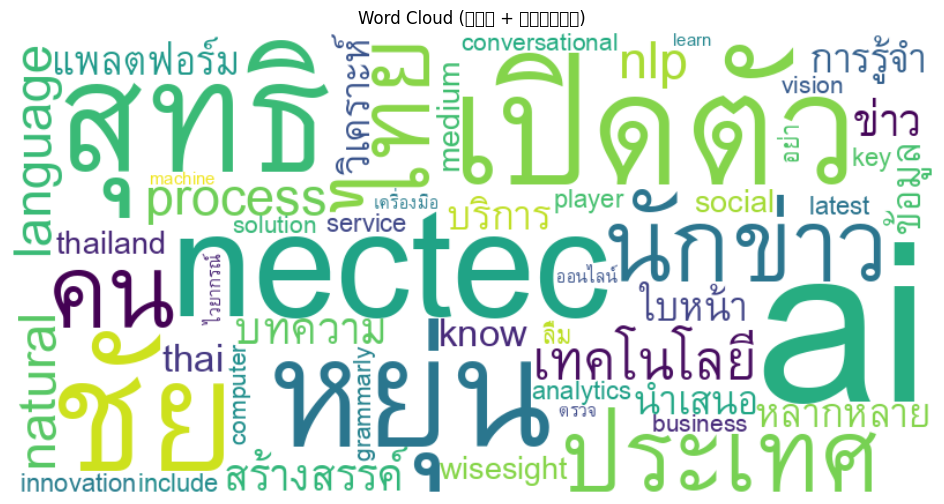


สรุปผลลัพธ์:
ข้อมูลต้นฉบับ:
 NECTEC เปิดตัว "สุทธิชัย หยุ่น" นักข่าว A.I. คนแรกแห่งประเทศไทย! เทคโนโลยีนี้ใช้ Natural Language Processing (NLP) เพื่อสร้างสรรค์บทความข่าว. แพลตฟอร์ม AI for Thai นำเสนอบริการหลากหลาย เช่น การรู้จำใบหน้า และการวิเคราะห์ข้อมูล. Do you know that **Wisesight** is Thailand's Social Media Analytics Service? It's a key player. The latest **innovations** include conversational AI and computer vision solutions for business. อย่าลืม! Grammarly เป็นเครื่องมือตรวจคำและไวยากรณ์ออนไลน์ที่ใช้ **Machine Learning** 
--------------------------------------------------
Tokenized & Processed:
['nectec', 'เปิดตัว', 'สุทธิ', 'ชัย', 'หยุ่น', 'นักข่าว', 'ai', 'คน', 'ประเทศ', 'ไทย', 'เทคโนโลยี', 'natural', 'language', 'process', 'nlp', 'สร้างสรรค์', 'บทความ', 'ข่าว', 'แพลตฟอร์ม', 'ai', 'thai', 'นำเสนอ', 'บริการ', 'หลากหลาย', 'การรู้จำ', 'ใบหน้า', 'วิเคราะห์', 'ข้อมูล', 'know', 'wisesight', 'thailand', 'social', 'medium', 'analytics', 'service', 'key', 'player', 'latest', 'innovat

In [ ]:
# -*- coding: utf-8 -*-
# ===========================================
# Text Preprocessing + Word Frequency + Word Cloud
# ภาษาไทย-อังกฤษ (พร้อมรันได้บน PyThaiNLP ล่าสุด)
# ===========================================

import nltk
import string
import re
from collections import Counter
from pythainlp.tokenize import word_tokenize as th_tokenize
from pythainlp.corpus import thai_stopwords
from nltk.corpus import stopwords as eng_stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ----------------- Download NLTK Resources -----------------
for resource in ['stopwords', 'wordnet', 'punkt']:
    try:
        nltk.data.find(f'corpora/{resource}')
    except LookupError:
        nltk.download(resource)

# ----------------- Stopwords & Punctuation -----------------
eng_stopwords_list = set(eng_stopwords.words('english'))
thai_stopwords_list = set(thai_stopwords())
punctuation_list = string.punctuation + '”‘—“'

# ----------------- Sample Raw Data -----------------
raw_data = """
NECTEC เปิดตัว "สุทธิชัย หยุ่น" นักข่าว A.I. คนแรกแห่งประเทศไทย! เทคโนโลยีนี้ใช้ Natural Language Processing (NLP) เพื่อสร้างสรรค์บทความข่าว.
แพลตฟอร์ม AI for Thai นำเสนอบริการหลากหลาย เช่น การรู้จำใบหน้า และการวิเคราะห์ข้อมูล.
Do you know that **Wisesight** is Thailand's Social Media Analytics Service? It's a key player.
The latest **innovations** include conversational AI and computer vision solutions for business.
อย่าลืม! Grammarly เป็นเครื่องมือตรวจคำและไวยากรณ์ออนไลน์ที่ใช้ **Machine Learning**
"""

# ===========================================
# 1. Lowercasing
# ===========================================
data_lower = raw_data.lower()

# ===========================================
# 2. Remove Punctuation, Symbols, Numbers
# ===========================================
def remove_punctuation_and_symbols(text):
    text = ''.join(char for char in text if char not in punctuation_list)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[*]', '', text)
    return text

data_clean = remove_punctuation_and_symbols(data_lower)

# ===========================================
# 3. Tokenization (ไทย + อังกฤษ)
# ใช้ engine ใหม่ 'newmm' ของ PyThaiNLP
# ===========================================
tokens = th_tokenize(data_clean, engine='newmm')
print(f"3. Tokenization เสร็จสมบูรณ์. จำนวนคำเริ่มต้น: {len(tokens)}")

# ===========================================
# 4. Remove Stopwords & Clean up
# ===========================================
tokens_no_stopwords = [t.strip() for t in tokens if t.strip() and t not in eng_stopwords_list and t not in thai_stopwords_list]

# ===========================================
# 5. Lemmatize ภาษาอังกฤษ
# ภาษาไทยไม่ทำ Lemmatization
# ===========================================
eng_lemmatizer = WordNetLemmatizer()

def is_english_word(word):
    return bool(re.fullmatch(r'[a-zA-Z]+', word))

processed_tokens = []
for token in tokens_no_stopwords:
    if is_english_word(token):
        token = eng_lemmatizer.lemmatize(token, pos='n')
        if token == token:
            token = eng_lemmatizer.lemmatize(token, pos='v')
    processed_tokens.append(token)

# ===========================================
# 6. Combine Results
# ===========================================
final_result = " ".join(processed_tokens)

# ===========================================
# 7. Word Frequency
# ===========================================
word_freq = Counter(processed_tokens)
print("Top 10 words by frequency:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

# ===========================================
# 8. Word Cloud Visualization
# ===========================================
# ใช้ฟอนต์ภาษาไทย/อังกฤษที่มีอยู่ในระบบ
# ลองใช้ฟอนต์ ' Garuda.ttf' ซึ่งมักมีใน Colab
thai_font_path = "/usr/share/fonts/truetype/Garuda.ttf" # เปลี่ยนเป็นฟอนต์ไทยที่มีในระบบ หรือ path ที่อัปโหลดมา
wc = WordCloud(
    font_path=thai_font_path,
    width=800, height=400,
    background_color="white"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (ไทย + อังกฤษ)")
plt.show()

# ===========================================
# 9. Summary
# ===========================================
print("\nสรุปผลลัพธ์:")
print(f"ข้อมูลต้นฉบับ:\n{raw_data.replace(chr(10), ' ')}")
print("-"*50)
print(f"Tokenized & Processed:\n{processed_tokens}")
print("-"*50)
print(f"Combined String:\n{final_result}")

Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

The code for performing text analysis (word frequency and word cloud generation) is in the cell below. Please ensure that the font path for the word cloud is correct to avoid the `OSError`.

In [ ]:
#----------------------------------------------
# Your code starts here


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **